In [31]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [29]:
df = pd.read_csv('Queries.csv')
df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


In [3]:
df.isnull().sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [6]:
df.describe()

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


In [11]:
df['CTR'] = df['CTR'].astype(str)
df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100
df['CTR'].head()

0    0.003583
1    0.008128
2    0.000283
3    0.004057
4    0.007638
Name: CTR, dtype: float64

In [18]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data
df = pd.DataFrame({
    'query': [
        'How to learn Python?',
        'Python tutorial for beginners',
        'Best Python courses online',
        'How to master machine learning',
        'Top machine learning books'
    ]
})
def clean_and_split(query):
    query = re.sub(r'[^\w\s]', '', query).lower()
    words = query.split()
    return words
    
word_list = df['query'].apply(clean_and_split).sum()
word_freq = Counter(word_list)

word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

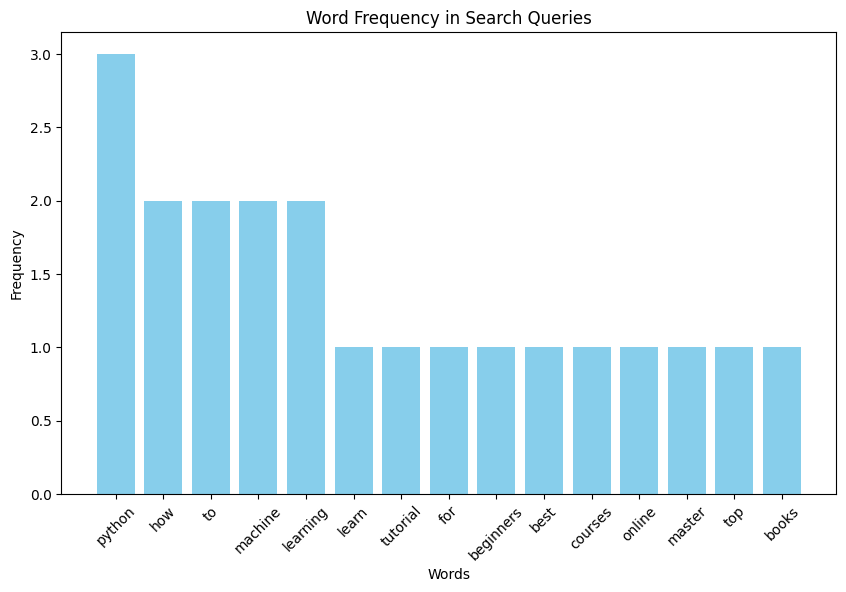

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Search Queries')
plt.xticks(rotation=45)
plt.show()

In [20]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'query': [
        'How to learn Python?',
        'Python tutorial for beginners',
        'Best Python courses online',
        'How to master machine learning',
        'Top machine learning books'
    ],
    'clicks': [120, 340, 210, 150, 85],
    'impressions': [1000, 1500, 1200, 900, 600]
})

top_queries_by_clicks = df.sort_values(by='clicks', ascending=False).reset_index(drop=True)

top_queries_by_impressions = df.sort_values(by='impressions', ascending=False).reset_index(drop=True)
print("Top Queries by Clicks:")
print(top_queries_by_clicks)
print("\nTop Queries by Impressions:")
print(top_queries_by_impressions)

Top Queries by Clicks:
                            query  clicks  impressions
0   Python tutorial for beginners     340         1500
1      Best Python courses online     210         1200
2  How to master machine learning     150          900
3            How to learn Python?     120         1000
4      Top machine learning books      85          600

Top Queries by Impressions:
                            query  clicks  impressions
0   Python tutorial for beginners     340         1500
1      Best Python courses online     210         1200
2            How to learn Python?     120         1000
3  How to master machine learning     150          900
4      Top machine learning books      85          600


In [21]:
df = pd.DataFrame({
    'query': [
        'How to learn Python?',
        'Python tutorial for beginners',
        'Best Python courses online',
        'How to master machine learning',
        'Top machine learning books'
    ],
    'clicks': [120, 340, 210, 150, 85],
    'impressions': [1000, 1500, 1200, 900, 600]
})
df['CTR'] = df['clicks'] / df['impressions']
highest_CTR = df.sort_values(by='CTR', ascending=False).head(5)
lowest_CTR = df.sort_values(by='CTR', ascending=True).head(5)

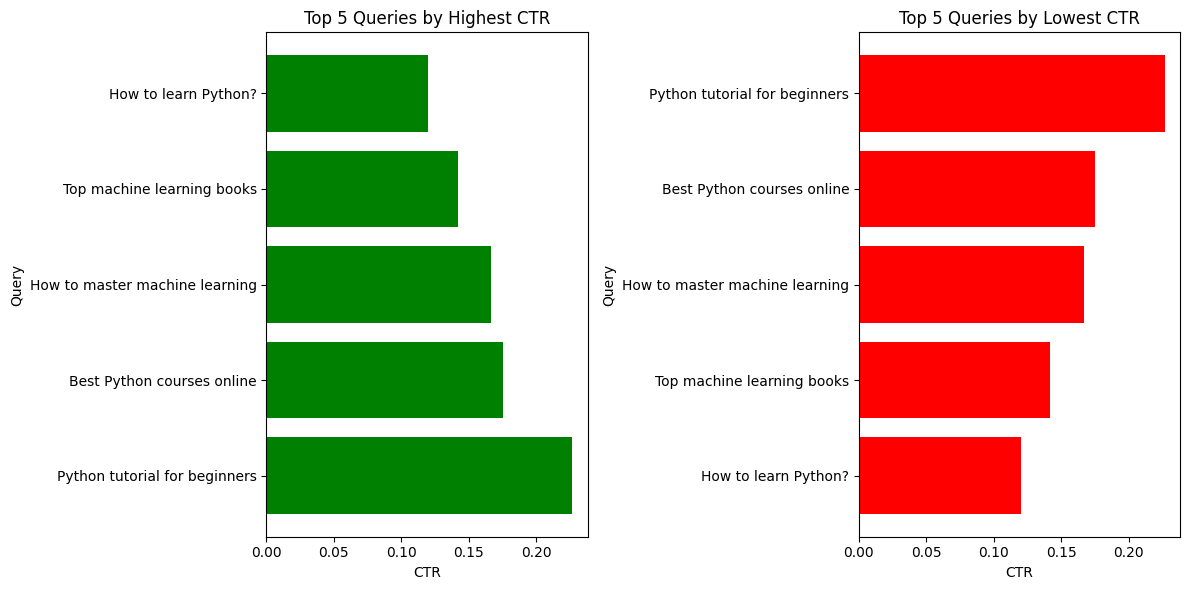

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(highest_CTR['query'], highest_CTR['CTR'], color='green')
plt.xlabel('CTR')
plt.ylabel('Query')
plt.title('Top 5 Queries by Highest CTR')
plt.subplot(1, 2, 2)
plt.barh(lowest_CTR['query'], lowest_CTR['CTR'], color='red')
plt.xlabel('CTR')
plt.ylabel('Query')
plt.title('Top 5 Queries by Lowest CTR')
plt.tight_layout()
plt.show()

In [25]:
df = pd.DataFrame({
    'query': [
        'How to learn Python?',
        'Python tutorial for beginners',
        'Best Python courses online',
        'How to master machine learning',
        'Top machine learning books'
    ],
    'clicks': [120, 340, 210, 150, 85],
    'impressions': [1000, 1500, 1200, 900, 600]
})

df['CTR'] = df['clicks'] / df['impressions']
correlation_matrix = df[['clicks', 'impressions', 'CTR']].corr()

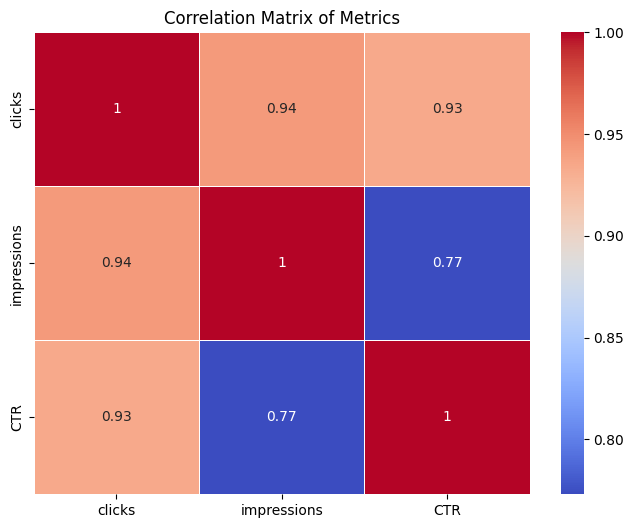

Correlation Matrix:
                clicks  impressions       CTR
clicks       1.000000     0.942782  0.933942
impressions  0.942782     1.000000  0.772956
CTR          0.933942     0.772956  1.000000


In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Metrics')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)

In [37]:
df = pd.DataFrame({
    'query': [
        'number guessing game python', 
        'thecleverprogrammer', 
        'python projects with source code',
        'the clever programmer',
        'rock paper scissors python',
        'classification report',
        'machine learning roadmap',
        'r2 score',
        'text to handwriting',
        'python turtle'
    ],
    'clicks': [5223, 2809, 2077, 1931, 1111, 933, 708, 367, 222, 52],
    'impressions': [14578, 3456, 73380, 2528, 35824, 39896, 42715, 56322, 11283, 18228],
    'CTR': [0.3583, 0.8128, 0.0283, 0.7638, 0.0310, 0.0234, 0.0166, 0.0065, 0.0197, 0.0029],
    'position': [1.61, 1.02, 5.94, 1.09, 7.19, 7.53, 8.97, 9.33, 28.52, 18.75]
})

df_sorted = df.sort_values(by='clicks', ascending=False).reset_index(drop=True)

print("Top queries:")
print(df_sorted[['query', 'clicks', 'impressions', 'CTR', 'position']])


Top queries:
                              query  clicks  impressions     CTR  position
0       number guessing game python    5223        14578  0.3583      1.61
1               thecleverprogrammer    2809         3456  0.8128      1.02
2  python projects with source code    2077        73380  0.0283      5.94
3             the clever programmer    1931         2528  0.7638      1.09
4        rock paper scissors python    1111        35824  0.0310      7.19
5             classification report     933        39896  0.0234      7.53
6          machine learning roadmap     708        42715  0.0166      8.97
7                          r2 score     367        56322  0.0065      9.33
8               text to handwriting     222        11283  0.0197     28.52
9                     python turtle      52        18228  0.0029     18.75
